In [1]:
import utils
from sklearn.manifold import TSNE

In [2]:
idx = utils.split_index('shows/track_1_shows/split/train.csv')
da = utils.load_pool('shows/track_1_shows/feature', idx)

In [3]:
dataset = []
for key in da:
    dataset.append(da[key])

In [15]:
import numpy as np

dataset = np.array(dataset)
dataset.shape

(3000, 512)

In [16]:
tsne = TSNE(n_components=2, perplexity=100)

In [17]:
X = tsne.fit_transform(dataset)

In [18]:
X

array([[  7.38447   ,  -3.7750785 ],
       [ 11.106826  ,  -1.2950625 ],
       [  0.25528726, -18.97431   ],
       ...,
       [  8.42999   , -20.108576  ],
       [ 22.944794  ,  -2.7551055 ],
       [ -4.207685  ,  10.242435  ]], dtype=float32)

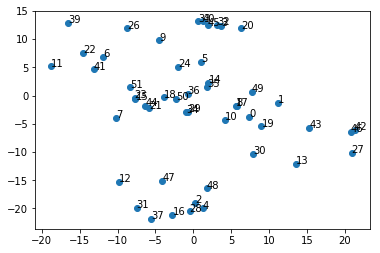

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:50, 0], X[:50, 1])

for i in enumerate(idx[:50]):
    ax.annotate(i[1], (X[i[0]][0], X[i[0]][1]))
plt.show()